
### Data Preparation
### Session Item Level Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

# 1. Data Wrangling
## 1.1 Importing the datasets

In [2]:
clicks = pd.read_csv("yoochoose-clicks.dat", names=['Session ID', 'Timestamp', 'Item ID', 'Category'],parse_dates = ['Timestamp'],low_memory=False)
buys = pd.read_csv("yoochoose-buys.dat", names=['Session ID', 'Timestamp', 'Item ID', 'Price', 'Quantity'],parse_dates = ['Timestamp'])

## 1.2 EDA - <font color='red'>please refer to the notebook -"HW3-DMA Session Feaures" for this whole section (i.e., 1.2)</font>
Some of the feature calculations were similar hence, this section is repeated

Both Clicks and Buys datasets contain 6 months of data going from April to September 2014.

In [6]:
# timespan of the clicks dataset
print("Clicks min date:",clicks["Timestamp"].dt.date.min())
print("Clicks max date:",clicks["Timestamp"].dt.date.max())

# timespan of the buys dataset
print("Buys min date:",buys["Timestamp"].dt.date.min())
print("Buys max date:",buys["Timestamp"].dt.date.max())

Clicks min date: 2014-04-01
Clicks max date: 2014-09-30
Buys min date: 2014-04-01
Buys max date: 2014-09-30


In [37]:
# shape of the datasets
print('Clicks shape:',clicks.shape)
print('Buys shape:',buys.shape)

Clicks shape: (33003944, 18)
Buys shape: (1150753, 5)


### Proportion of sessions resulting in purchase

In [18]:
# number of unique sessions
print(f"Number of unique sessions clicks dataset: {clicks['Session ID'].nunique()}") 
print(f"Number of unique sessions buys dataset: {buys['Session ID'].nunique()}") 
# proportion of sessions resulting in purchase
print(f"The proportion of session resulting in a purchase is: {round(buys['Session ID'].nunique()/clicks['Session ID'].nunique(),3)}") 

Number of unique sessions clicks dataset: 9249729
Number of unique sessions buys dataset: 509696
The proportion of session resulting in a purchase is: 0.055


In [166]:
# check rows with price = 0
print('Num. entries with price = 0 is:',buys[buys['Price']==0].shape[0])
# check rows with quantity = 0
print('Num. entries with quantity = 0 is:',buys[buys['Quantity']==0].shape[0])

Num. entries with price = 0 is: 610030
Num. entries with quantity = 0 is: 610030


In [169]:
# check if rows with price and quantity = 0 appear also in sessions with actual purchases (i.e., price and quantity <> 0)
### WRONG
buys1=buys.copy()
sessions_price_zero=buys1['Session ID'][buys1['Price']==0]
l_sess_price_zero = sessions_price_zero.values.tolist()
buys1=buys1[buys1['Session ID'].isin(l_sess_price_zero)]

buys1.head(10)

,Session ID,Timestamp,Item ID,Price,Quantity,tot_quantity,price_x_quantity,tot_spend
289,281963,2014-04-07 20:33:54.828000+00:00,214563144,0,0,0,0,0
336,210097,2014-04-07 17:45:33.522000+00:00,214508942,0,0,0,0,0
502,351577,2014-04-07 17:45:02.666000+00:00,214827022,0,0,0,0,0
503,351577,2014-04-07 17:45:02.740000+00:00,214829741,0,0,0,0,0
568,419982,2014-04-07 15:02:06.999000+00:00,214748300,0,0,0,0,0
731,210612,2014-04-07 14:42:23.943000+00:00,214716977,0,0,0,0,0
732,210612,2014-04-07 14:42:24.032000+00:00,214716941,0,0,0,0,0
758,420287,2014-04-07 17:31:37.201000+00:00,214821277,1046,2,2,2092,2092
759,420287,2014-04-07 18:12:30.007000+00:00,214821277,0,0,2,0,2092
1013,139959,2014-04-07 17:41:38.837000+00:00,214601040,0,0,0,0,0


Because there are 610030 entries with price and quantity equal to zero, we don't want to label those rows as rows corresponding to a purchase, therefore we remove them from the buys dataset and we recalculate the proportion of sessions actually resulting in a purchase.

We also notice that these rows appear in sessions in which users actually purchased other items such as session 420287. 

### Ratio of purchases over number of clicks by hour, day of the week, number of the month 

In [3]:
# extract time, hour, day of the week, number of the month
# time
clicks['time'] =clicks.Timestamp.dt.time
# hour
clicks['hour'] =clicks.Timestamp.dt.hour
# day
clicks['day'] =clicks.Timestamp.dt.dayofweek
# month
clicks['month'] =clicks.Timestamp.dt.month

clicks.head()

,Session ID,Timestamp,Item ID,Category,time,hour,day,month
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10:51:09.277000,10,0,4
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10:54:09.868000,10,0,4
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10:54:46.998000,10,0,4
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10:57:00.306000,10,0,4
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13:56:37.614000,13,0,4


### Number of clicks per session


In [4]:
# number of clicks per session
clicks['num_clicks_session']= clicks[["Session ID","Item ID"]].groupby("Session ID").transform('count')
clicks.head()

,Session ID,Timestamp,Item ID,Category,time,hour,day,month,num_clicks_session
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10:51:09.277000,10,0,4,4
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10:54:09.868000,10,0,4,4
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10:54:46.998000,10,0,4,4
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10:57:00.306000,10,0,4,4
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13:56:37.614000,13,0,4,6


### Length of each session

In [5]:
# length of each session - time between 1st and last clicks

# get first and last click time
time_first_click = clicks.groupby('Session ID')['Timestamp'].min().reset_index(name='First')
time_last_click = clicks.groupby('Session ID')['Timestamp'].max().reset_index(name='Last')

session_length = pd.merge(time_first_click,time_last_click, on = 'Session ID')
session_length['length'] = (session_length['Last']-session_length['First']).astype('timedelta64[s]')
session_length.head()

,Session ID,First,Last,length
0,1,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0
1,2,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,359.0
2,3,2014-04-02 13:17:46.940000+00:00,2014-04-02 13:30:12.318000+00:00,745.0
3,4,2014-04-07 12:09:10.948000+00:00,2014-04-07 12:26:25.416000+00:00,1034.0
4,6,2014-04-06 16:58:20.848000+00:00,2014-04-06 17:02:26.976000+00:00,246.0


In [24]:
print('length mean:', session_length['length'].mean())
print('length median:', session_length['length'].median())

length mean: 381.2030260562228
length median: 127.0


In [6]:
# Compute dwell time for each click - what should we do with the last click of each session which is NaT?
clicks['lag'] = clicks.groupby(['Session ID'])['Timestamp'].shift(-1)
clicks['dwell_time'] = clicks["lag"] - clicks["Timestamp"] 
#clicks[] = clicks['dwell_time'].dt.seconds

clicks.head()

,Session ID,Timestamp,Item ID,Category,time,hour,day,month,num_clicks_session,lag,dwell_time
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10:51:09.277000,10,0,4,4,2014-04-07 10:54:09.868000+00:00,0 days 00:03:00.591000
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10:54:09.868000,10,0,4,4,2014-04-07 10:54:46.998000+00:00,0 days 00:00:37.130000
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10:54:46.998000,10,0,4,4,2014-04-07 10:57:00.306000+00:00,0 days 00:02:13.308000
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10:57:00.306000,10,0,4,4,NaT,NaT
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13:56:37.614000,13,0,4,6,2014-04-07 13:57:19.373000+00:00,0 days 00:00:41.759000


### Buy Flag 
If the session ended in a buy activity

In [7]:
# add column of 1 to the buys dataset to identify sessions with purchase after merging with clicks dataset
clicks['label'] = clicks['Session ID'].isin(buys['Session ID'])
clicks.head()

,Session ID,Timestamp,Item ID,Category,time,hour,day,month,num_clicks_session,lag,dwell_time,label
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10:51:09.277000,10,0,4,4,2014-04-07 10:54:09.868000+00:00,0 days 00:03:00.591000,False
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10:54:09.868000,10,0,4,4,2014-04-07 10:54:46.998000+00:00,0 days 00:00:37.130000,False
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10:54:46.998000,10,0,4,4,2014-04-07 10:57:00.306000+00:00,0 days 00:02:13.308000,False
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10:57:00.306000,10,0,4,4,NaT,NaT,False
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13:56:37.614000,13,0,4,6,2014-04-07 13:57:19.373000+00:00,0 days 00:00:41.759000,False


### Session Length -
merge the session length with clicks data

In [8]:
clicks = clicks.merge(session_length, on='Session ID', how='left')
clicks.head()

,Session ID,Timestamp,Item ID,Category,time,hour,day,month,num_clicks_session,lag,dwell_time,label,First,Last,length
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10:51:09.277000,10,0,4,4,2014-04-07 10:54:09.868000+00:00,0 days 00:03:00.591000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10:54:09.868000,10,0,4,4,2014-04-07 10:54:46.998000+00:00,0 days 00:00:37.130000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10:54:46.998000,10,0,4,4,2014-04-07 10:57:00.306000+00:00,0 days 00:02:13.308000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10:57:00.306000,10,0,4,4,NaT,NaT,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13:56:37.614000,13,0,4,6,2014-04-07 13:57:19.373000+00:00,0 days 00:00:41.759000,False,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,359.0


### Time between clicks

Get max and average time between two clicks

In [9]:
clicks['time_bet']=clicks['dwell_time'].dt.seconds
clicks.head()

,Session ID,Timestamp,Item ID,Category,time,hour,day,month,num_clicks_session,lag,dwell_time,label,First,Last,length,time_bet
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10:51:09.277000,10,0,4,4,2014-04-07 10:54:09.868000+00:00,0 days 00:03:00.591000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,180.0
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10:54:09.868000,10,0,4,4,2014-04-07 10:54:46.998000+00:00,0 days 00:00:37.130000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,37.0
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10:54:46.998000,10,0,4,4,2014-04-07 10:57:00.306000+00:00,0 days 00:02:13.308000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,133.0
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10:57:00.306000,10,0,4,4,NaT,NaT,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,NaN
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13:56:37.614000,13,0,4,6,2014-04-07 13:57:19.373000+00:00,0 days 00:00:41.759000,False,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,359.0,41.0


In [10]:
#create a copy of clicks data and calculate the max and average session time between two clicks
#remove the time where its NaN basically for last click of session
clicks_new=clicks.copy()
clicks_new = clicks_new.dropna()
clicks_new.head()

,Session ID,Timestamp,Item ID,Category,time,hour,day,month,num_clicks_session,lag,dwell_time,label,First,Last,length,time_bet
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10:51:09.277000,10,0,4,4,2014-04-07 10:54:09.868000+00:00,0 days 00:03:00.591000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,180.0
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10:54:09.868000,10,0,4,4,2014-04-07 10:54:46.998000+00:00,0 days 00:00:37.130000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,37.0
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10:54:46.998000,10,0,4,4,2014-04-07 10:57:00.306000+00:00,0 days 00:02:13.308000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,133.0
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13:56:37.614000,13,0,4,6,2014-04-07 13:57:19.373000+00:00,0 days 00:00:41.759000,False,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,359.0,41.0
5,2,2014-04-07 13:57:19.373000+00:00,214662742,0,13:57:19.373000,13,0,4,6,2014-04-07 13:58:37.446000+00:00,0 days 00:01:18.073000,False,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,359.0,78.0


In [11]:
clicks_new.shape

(23754215, 16)

In [12]:
clicks_new1 = clicks_new.groupby(['Session ID'], as_index=False).agg({'time_bet': ['mean', 'max']})
clicks_new1.head()

Session ID     time_bet        
                     mean     max
0          1   116.666667   180.0
1          2    71.400000   118.0
2          3   372.000000   495.0
3          4  1034.000000  1034.0
4          6   246.000000   246.0

In [13]:
clicks = clicks.merge(clicks_new1, on='Session ID',how='left')
clicks.head()

C:\Users\saggarwal\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Session ID,Timestamp,Item ID,Category,time,hour,day,month,num_clicks_session,lag,dwell_time,label,First,Last,length,time_bet,"(time_bet, mean)","(time_bet, max)"
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10:51:09.277000,10,0,4,4,2014-04-07 10:54:09.868000+00:00,0 days 00:03:00.591000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,180.0,116.666667,180.0
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10:54:09.868000,10,0,4,4,2014-04-07 10:54:46.998000+00:00,0 days 00:00:37.130000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,37.0,116.666667,180.0
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10:54:46.998000,10,0,4,4,2014-04-07 10:57:00.306000+00:00,0 days 00:02:13.308000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,133.0,116.666667,180.0
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10:57:00.306000,10,0,4,4,NaT,NaT,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,NaN,116.666667,180.0
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13:56:37.614000,13,0,4,6,2014-04-07 13:57:19.373000+00:00,0 days 00:00:41.759000,False,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,359.0,41.0,71.400000,118.0


Rename some of the columns for consistency

In [14]:
clicks.columns

Index([        'Session ID',          'Timestamp',            'Item ID',
                 'Category',               'time',               'hour',
                      'day',              'month', 'num_clicks_session',
                      'lag',         'dwell_time',              'label',
                    'First',               'Last',             'length',
                 'time_bet', ('time_bet', 'mean'),  ('time_bet', 'max')],
      dtype='object')

rename columns

In [15]:
clicks=clicks.rename(columns={('time_bet', 'mean'):'Avg Session Time',('time_bet', 'max'):'Max Session Time'})
clicks.head()

,Session ID,Timestamp,Item ID,Category,time,hour,day,month,num_clicks_session,lag,dwell_time,label,First,Last,length,time_bet,Avg Session Time,Max Session Time
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10:51:09.277000,10,0,4,4,2014-04-07 10:54:09.868000+00:00,0 days 00:03:00.591000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,180.0,116.666667,180.0
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10:54:09.868000,10,0,4,4,2014-04-07 10:54:46.998000+00:00,0 days 00:00:37.130000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,37.0,116.666667,180.0
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10:54:46.998000,10,0,4,4,2014-04-07 10:57:00.306000+00:00,0 days 00:02:13.308000,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,133.0,116.666667,180.0
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10:57:00.306000,10,0,4,4,NaT,NaT,False,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,351.0,NaN,116.666667,180.0
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13:56:37.614000,13,0,4,6,2014-04-07 13:57:19.373000+00:00,0 days 00:00:41.759000,False,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,359.0,41.0,71.400000,118.0


Keep only the required fields in the dataset

In [16]:
clicks_mid = clicks[['Session ID','Timestamp','Item ID','Category','hour','day','month','num_clicks_session','label','length','time_bet','Avg Session Time','Max Session Time']]
clicks_mid.head()

,Session ID,Timestamp,Item ID,Category,hour,day,month,num_clicks_session,label,length,time_bet,Avg Session Time,Max Session Time
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10,0,4,4,False,351.0,180.0,116.666667,180.0
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10,0,4,4,False,351.0,37.0,116.666667,180.0
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10,0,4,4,False,351.0,133.0,116.666667,180.0
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10,0,4,4,False,351.0,NaN,116.666667,180.0
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13,0,4,6,False,359.0,41.0,71.400000,118.0


### Calculate unique items clicked in a session

In [17]:
clicks_mid['num_items']=clicks_mid[["Session ID","Item ID"]].groupby("Session ID")['Item ID'].transform('nunique')
clicks_mid.head()

<ipython-input-17-5f7beddadac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clicks_mid['num_items']=clicks_mid[["Session ID","Item ID"]].groupby("Session ID")['Item ID'].transform('nunique')


,Session ID,Timestamp,Item ID,Category,hour,day,month,num_clicks_session,label,length,time_bet,Avg Session Time,Max Session Time,num_items
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10,0,4,4,False,351.0,180.0,116.666667,180.0,4
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10,0,4,4,False,351.0,37.0,116.666667,180.0,4
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10,0,4,4,False,351.0,133.0,116.666667,180.0,4
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10,0,4,4,False,351.0,NaN,116.666667,180.0,4
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13,0,4,6,False,359.0,41.0,71.400000,118.0,5


### Merge buy data information

In [18]:
buys.head()

,Session ID,Timestamp,Item ID,Price,Quantity
0,420374,2014-04-06 18:44:58.314000+00:00,214537888,12462,1
1,420374,2014-04-06 18:44:58.325000+00:00,214537850,10471,1
2,281626,2014-04-06 09:40:13.032000+00:00,214535653,1883,1
3,420368,2014-04-04 06:13:28.848000+00:00,214530572,6073,1
4,420368,2014-04-04 06:13:28.858000+00:00,214835025,2617,1


There are instances where similar item was bought multiple times in similar session but due to no information available we are summing the information

## 1.3 Item level metrics 
- Average Item price
- Session counts per item
- click sessions per item
- Popularity Score
- Popularity Flag for high popularity score items > 1%

In [19]:
buys['month'] =buys.Timestamp.dt.month
buys.month.unique()

array([4, 5, 6, 7, 8, 9], dtype=int64)

In [20]:
clicks.month.unique()

array([4, 5, 6, 7, 8, 9], dtype=int64)

### Break into train and test

In [22]:
buys_train = buys[buys['month']!=9]
buys_test = buys[buys['month']==9]
print(f"Number of records buy train dataset: {buys_train.shape}") 
print(f"Number of records buy test dataset: {buys_test.shape}") 
print(f"Number of unique sessions buys train dataset: {buys_train['Session ID'].nunique()}") 
print(f"Number of unique sessions buys test dataset: {buys_test['Session ID'].nunique()}")

Number of records buy train dataset: (947629, 6)
Number of records buy test dataset: (203124, 6)
Number of unique sessions buys train dataset: 428584
Number of unique sessions buys test dataset: 81112


In [25]:
clicks_train = clicks_mid[(clicks_mid['month']!=9)&clicks_mid['label']==True]
clicks_test = clicks_mid[(clicks_mid['month']==9)&clicks_mid['label']==True]
print(f"Number of records clicks train dataset: {clicks_train.shape}") 
print(f"Number of records clicks test dataset: {clicks_test.shape}") 
print(f"Number of unique sessions clicks train dataset: {clicks_train['Session ID'].nunique()}") 
print(f"Number of unique sessions clicks test dataset: {clicks_test['Session ID'].nunique()}")

Number of records clicks train dataset: (2752443, 14)
Number of records clicks test dataset: (553244, 14)
Number of unique sessions clicks train dataset: 428590
Number of unique sessions clicks test dataset: 81111


### Item weighted price 

In [26]:
#item_price = buys_train[['Item ID','Price']].drop_duplicates()
buys_train['Amount'] = buys_train['Quantity']*buys_train['Price']
item_amount = buys_train.groupby(['Item ID'],as_index=False)['Amount'].sum()
item_quanity = buys_train.groupby(['Item ID'],as_index=False)['Quantity'].sum()
item_price1=item_amount.merge(item_quanity,on='Item ID', how='left')
item_price1['Price']=item_price1['Amount']/item_price1['Quantity']
item_price1.head()

<ipython-input-26-7f6dea3ff324>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buys_train['Amount'] = buys_train['Quantity']*buys_train['Price']


,Item ID,Amount,Quantity,Price
0,214507331,320382,102,3141.00000
1,214507365,26936,52,518.00000
2,214507385,56064,192,292.00000
3,214507387,30557,109,280.33945
4,214507408,13680,57,240.00000


In [29]:
#item_price = buys_train[['Item ID','Price']].drop_duplicates()
buys_test['Amount'] = buys_test['Quantity']*buys_test['Price']
item_amount_test = buys_test.groupby(['Item ID'],as_index=False)['Amount'].sum()
item_quanity_test = buys_test.groupby(['Item ID'],as_index=False)['Quantity'].sum()
item_price2=item_amount_test.merge(item_quanity_test,on='Item ID', how='left')
item_price2['Price']=item_price2['Amount']/item_price2['Quantity']
item_price2.head()

<ipython-input-29-d64c20441478>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buys_test['Amount'] = buys_test['Quantity']*buys_test['Price']


,Item ID,Amount,Quantity,Price
0,214507331,94230,30,3141.000000
1,214507365,22274,43,518.000000
2,214507385,24820,85,292.000000
3,214507387,61911,261,237.206897
4,214507408,9840,41,240.000000


### Popularity - number of purchase sessions over number of click sessions

In [27]:
buys_item_train = buys_train.groupby('Item ID', as_index=False)['Session ID'].nunique()
buys_item_test = buys_test.groupby('Item ID', as_index=False)['Session ID'].nunique()
#clicks_train=clicks_merge[clicks_merge['month']!=9]
clicks_item_train = clicks_train.groupby('Item ID', as_index=False)['Session ID'].nunique()
clicks_item_test = clicks_test.groupby('Item ID', as_index=False)['Session ID'].nunique()

In [28]:
clicks_item_test.head()

,Item ID,Session ID
0,214507331,39
1,214507365,24
2,214507385,14
3,214507387,19
4,214507408,12


In [30]:
item_price1= item_price1.rename(columns= {'Price':'Avg_item_price'})
buys_item_train=buys_item_train.rename(columns={'Session ID':'Buy_sessions'})
clicks_item_train=clicks_item_train.rename(columns={'Session ID':'Click_sessions'})
clicks_item_train = clicks_item_train.merge(buys_item_train, on ='Item ID', how='left')
clicks_item_train = clicks_item_train.merge(item_price1, on ='Item ID', how='left')

In [31]:
item_price2= item_price2.rename(columns= {'Price':'Avg_item_price'})
buys_item_test=buys_item_test.rename(columns={'Session ID':'Buy_sessions'})
clicks_item_test=clicks_item_test.rename(columns={'Session ID':'Click_sessions'})
clicks_item_test = clicks_item_test.merge(buys_item_test, on ='Item ID', how='left')
clicks_item_test = clicks_item_test.merge(item_price2, on ='Item ID', how='left')

In [32]:
clicks_item_train = clicks_item_train.fillna(0)
clicks_item_train['Popularity']=clicks_item_train['Buy_sessions']/clicks_item_train['Click_sessions']

clicks_item_train.head()

,Item ID,Click_sessions,Buy_sessions,Amount,Quantity,Avg_item_price,Popularity
0,214507331,321,204.0,320382.0,102.0,3141.00000,0.635514
1,214507365,101,58.0,26936.0,52.0,518.00000,0.574257
2,214507385,69,57.0,56064.0,192.0,292.00000,0.826087
3,214507387,35,27.0,30557.0,109.0,280.33945,0.771429
4,214507408,59,40.0,13680.0,57.0,240.00000,0.677966


### Poularity rank

In [36]:
clicks_item_train['Popularity_Rank'] = clicks_item_train['Popularity'].rank(ascending=False, method='dense')
clicks_item_train.sort_values(by='Popularity_Rank')

,Item ID,Click_sessions,Buy_sessions,Amount,Quantity,Avg_item_price,Popularity,Popularity_Rank
20085,214816655,1,1.0,728.0,1.0,728.0,1.0,1.0
22466,214832855,2,2.0,0.0,0.0,0.0,1.0,1.0
11621,214684447,2,2.0,1254.0,2.0,627.0,1.0,1.0
22461,214832837,1,1.0,4606.0,2.0,2303.0,1.0,1.0
22407,214832692,4,4.0,2092.0,2.0,1046.0,1.0,1.0
...,...,...,...,...,...,...,...,...
20918,214825222,1,0.0,0.0,0.0,0.0,0.0,3973.0
15477,214713234,1,0.0,0.0,0.0,0.0,0.0,3973.0
20920,214825250,2,0.0,0.0,0.0,0.0,0.0,3973.0
15482,214713249,1,0.0,0.0,0.0,0.0,0.0,3973.0


In [37]:
clicks_item_test = clicks_item_test.fillna(0)
clicks_item_test['Popularity']=clicks_item_test['Buy_sessions']/clicks_item_test['Click_sessions']

clicks_item_test.head()

,Item ID,Click_sessions,Buy_sessions,Amount,Quantity,Avg_item_price,Popularity
0,214507331,39,29.0,94230.0,30.0,3141.000000,0.743590
1,214507365,24,11.0,22274.0,43.0,518.000000,0.458333
2,214507385,14,10.0,24820.0,85.0,292.000000,0.714286
3,214507387,19,17.0,61911.0,261.0,237.206897,0.894737
4,214507408,12,8.0,9840.0,41.0,240.000000,0.666667


In [38]:
clicks_item_test['Popularity_Rank'] = clicks_item_test['Popularity'].rank(ascending=False, method='dense')
clicks_item_test.sort_values(by='Popularity_Rank')

,Item ID,Click_sessions,Buy_sessions,Amount,Quantity,Avg_item_price,Popularity,Popularity_Rank
7264,214702920,8,8.0,21120.0,88.0,240.0,1.0,1.0
11741,214840892,3,3.0,13188.0,7.0,1884.0,1.0,1.0
8719,214743641,1,1.0,2618.0,1.0,2618.0,1.0,1.0
14640,214856137,1,1.0,162.0,1.0,162.0,1.0,1.0
8721,214743697,1,1.0,2481.0,3.0,827.0,1.0,1.0
...,...,...,...,...,...,...,...,...
7192,214701641,1,0.0,0.0,0.0,0.0,0.0,1279.0
7195,214701684,2,0.0,0.0,0.0,0.0,0.0,1279.0
7196,214701703,1,0.0,0.0,0.0,0.0,0.0,1279.0
7226,214702706,1,0.0,0.0,0.0,0.0,0.0,1279.0


Merge Datasets with clicks data

In [39]:
print(f"Number of unique sessions clicks dataset: {clicks['Session ID'].nunique()}") 
print(f"Number of unique sessions clicks dataset: {clicks_train['Session ID'].nunique()}") 
#print(f"Number of unique sessions clicks dataset: {clicks_buy_train['Session ID'].nunique()}") 
print(f"Number of unique sessions buys dataset: {buys['Session ID'].nunique()}") 
print(f"Number of unique sessions buys dataset: {buys_train['Session ID'].nunique()}") 

Number of unique sessions clicks dataset: 9249729
Number of unique sessions clicks dataset: 428590
Number of unique sessions buys dataset: 509696
Number of unique sessions buys dataset: 428584


In [40]:
clicks_train = clicks_train.merge(clicks_item_train,on=['Item ID'], how='left')
clicks_train.head()

,Session ID,Timestamp,Item ID,Category,hour,day,month,num_clicks_session,label,length,...,Avg Session Time,Max Session Time,num_items,Click_sessions,Buy_sessions,Amount,Quantity,Avg_item_price,Popularity,Popularity_Rank
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,71.0,385.0,9,144,29.0,97383.0,93.0,1047.129032,0.201389,3150.0
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,71.0,385.0,9,144,29.0,97383.0,93.0,1047.129032,0.201389,3150.0
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,71.0,385.0,9,589,212.0,175728.0,168.0,1046.000000,0.359932,2365.0
3,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,71.0,385.0,9,589,212.0,175728.0,168.0,1046.000000,0.359932,2365.0
4,11,2014-04-03 10:46:57.355000+00:00,214821371,0,10,3,4,12,True,783.0,...,71.0,385.0,9,589,212.0,175728.0,168.0,1046.000000,0.359932,2365.0


In [47]:
clicks_test = clicks_test.merge(clicks_item_test,on=['Item ID'], how='left')
clicks_test.head()

,Session ID,Timestamp,Item ID,Category,hour,day,month,num_clicks_session,label,length,...,Avg Session Time,Max Session Time,num_items,Click_sessions,Buy_sessions,Amount,Quantity,Avg_item_price,Popularity,Popularity_Rank
0,9293637,2014-09-01 07:50:51.494000+00:00,214680371,S,7,0,9,2,True,87.0,...,87.0,87.0,1,736,391.0,4462759.0,445.0,10028.67191,0.531250,467.0
1,9293637,2014-09-01 07:52:18.940000+00:00,214680371,S,7,0,9,2,True,87.0,...,87.0,87.0,1,736,391.0,4462759.0,445.0,10028.67191,0.531250,467.0
2,9293662,2014-09-01 06:51:35.382000+00:00,214677615,S,6,0,9,2,True,757.0,...,757.0,757.0,1,270,119.0,150781.0,131.0,1151.00000,0.440741,617.0
3,9293662,2014-09-01 07:04:12.806000+00:00,214677615,S,7,0,9,2,True,757.0,...,757.0,757.0,1,270,119.0,150781.0,131.0,1151.00000,0.440741,617.0
4,9293704,2014-09-01 18:29:59.130000+00:00,214846258,S,18,0,9,2,True,210.0,...,210.0,210.0,1,101,40.0,40463.0,43.0,941.00000,0.396040,686.0


### Add buy flag at item level

In [46]:
buys_train['Item_Bought_flag']=1
clicks_train=clicks_train.merge(buys_train, on =['Session ID','Item ID'], how='left')
clicks_train.head()

<ipython-input-46-115af3d1af8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buys_train['Item_Bought_flag']=1


,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length,...,Avg_item_price,Popularity,Popularity_Rank,Item_Bought,Timestamp_y,Price,Quantity_y,month_y,Amount_y,Item_Bought_flag
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,1047.129032,0.201389,3150.0,True,NaT,NaN,NaN,NaN,NaN,NaN
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,1047.129032,0.201389,3150.0,True,NaT,NaN,NaN,NaN,NaN,NaN
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,1046.000000,0.359932,2365.0,True,2014-04-03 11:04:11.417000+00:00,1046.0,1.0,4.0,1046.0,1.0
3,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,1046.000000,0.359932,2365.0,True,2014-04-03 11:04:18.097000+00:00,1046.0,1.0,4.0,1046.0,1.0
4,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,1046.000000,0.359932,2365.0,True,2014-04-03 11:04:11.417000+00:00,1046.0,1.0,4.0,1046.0,1.0


In [48]:
buys_test['Item_Bought_flag']=1
clicks_test=clicks_test.merge(buys_test, on =['Session ID','Item ID'], how='left')
clicks_test.head()

<ipython-input-48-2dc16063f2ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buys_test['Item_Bought_flag']=1


,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length,...,Quantity_x,Avg_item_price,Popularity,Popularity_Rank,Timestamp_y,Price,Quantity_y,month_y,Amount_y,Item_Bought_flag
0,9293637,2014-09-01 07:50:51.494000+00:00,214680371,S,7,0,9,2,True,87.0,...,445.0,10028.67191,0.531250,467.0,2014-09-01 08:34:57.804000+00:00,9424.0,1.0,9.0,9424.0,1.0
1,9293637,2014-09-01 07:52:18.940000+00:00,214680371,S,7,0,9,2,True,87.0,...,445.0,10028.67191,0.531250,467.0,2014-09-01 08:34:57.804000+00:00,9424.0,1.0,9.0,9424.0,1.0
2,9293662,2014-09-01 06:51:35.382000+00:00,214677615,S,6,0,9,2,True,757.0,...,131.0,1151.00000,0.440741,617.0,2014-09-01 07:11:38.046000+00:00,1151.0,1.0,9.0,1151.0,1.0
3,9293662,2014-09-01 07:04:12.806000+00:00,214677615,S,7,0,9,2,True,757.0,...,131.0,1151.00000,0.440741,617.0,2014-09-01 07:11:38.046000+00:00,1151.0,1.0,9.0,1151.0,1.0
4,9293704,2014-09-01 18:29:59.130000+00:00,214846258,S,18,0,9,2,True,210.0,...,43.0,941.00000,0.396040,686.0,2014-09-01 18:38:10.349000+00:00,941.0,1.0,9.0,941.0,1.0


### Clicks per item within session

In [51]:
clicks_item_max = clicks_train.groupby(['Session ID','Item ID'], as_index=False)['hour'].count()

In [52]:
clicks_item_max = clicks_item_max.rename(columns={'hour':'clicks_per_item'})
clicks_item_max.head()

,Session ID,Item ID,clicks_per_item
0,11,214563337,1
1,11,214706462,1
2,11,214717089,1
3,11,214717436,1
4,11,214743335,1


In [54]:
clicks_train = clicks_train.merge(clicks_item_max,on=['Session ID','Item ID'], how='left')
clicks_train.shape

(2948243, 29)

In [55]:
clicks_train.head()

,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length,...,Popularity,Popularity_Rank,Item_Bought,Timestamp_y,Price,Quantity_y,month_y,Amount_y,Item_Bought_flag,clicks_per_item
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,0.201389,3150.0,True,NaT,NaN,NaN,NaN,NaN,NaN,2
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,0.201389,3150.0,True,NaT,NaN,NaN,NaN,NaN,NaN,2
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,0.359932,2365.0,True,2014-04-03 11:04:11.417000+00:00,1046.0,1.0,4.0,1046.0,1.0,6
3,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,0.359932,2365.0,True,2014-04-03 11:04:18.097000+00:00,1046.0,1.0,4.0,1046.0,1.0,6
4,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,0.359932,2365.0,True,2014-04-03 11:04:11.417000+00:00,1046.0,1.0,4.0,1046.0,1.0,6


### Max clicks per item per session

In [70]:
clicks_item_max10 = clicks_item_max.groupby(['Session ID'], as_index=False)['clicks_per_item'].max()
clicks_item_max10 = clicks_item_max10.rename(columns={'clicks_per_item':'max_click_per_item'})
clicks_train= clicks_train.merge(clicks_item_max10,on='Session ID', how='left')
clicks_train.shape

(2948243, 33)

In [56]:
clicks_item_max1 = clicks_test.groupby(['Session ID','Item ID'], as_index=False)['hour'].count()
clicks_item_max1 = clicks_item_max1.rename(columns={'hour':'clicks_per_item'})
#clicks_item_max.head()
clicks_test = clicks_test.merge(clicks_item_max1,on=['Session ID','Item ID'], how='left')
clicks_test.shape

(587940, 28)

In [69]:
clicks_item_max11 = clicks_item_max1.groupby(['Session ID'], as_index=False)['clicks_per_item'].max()
clicks_item_max11 = clicks_item_max11.rename(columns={'clicks_per_item':'max_click_per_item'})
clicks_test= clicks_test.merge(clicks_item_max11,on='Session ID', how='left')
clicks_test.shape

(587940, 31)

### Item category flag

In [57]:
clicks_train['Category_flag']= 'Regular'
clicks_train.loc[clicks_train['Category'] == 'S', 'Category_flag'] = 'Offer'  
clicks_train.loc[clicks_train['Category'] == '0', 'Category_flag'] = 'No Category'  
clicks_train.loc[clicks_train['Category'].str.len()>2, 'Category_flag'] = 'Sports'  


In [58]:
clicks_test['Category_flag']= 'Regular'
clicks_test.loc[clicks_test['Category'] == 'S', 'Category_flag'] = 'Offer'  
clicks_test.loc[clicks_test['Category'] == '0', 'Category_flag'] = 'No Category'  
clicks_test.loc[clicks_test['Category'].str.len()>2, 'Category_flag'] = 'Sports'  

### First and last clicks of a session

In [67]:
clicks_train['Rank_item_session']=clicks_train[['Session ID','Timestamp_x','Item ID']].sort_values(by=['Session ID','Timestamp_x']).groupby(['Session ID']).rank("dense")
#clicks_train['Rank_item_session_last']=clicks_train[['Session ID','Timestamp_x','Item ID']].sort_values(by=['Session ID','Timestamp_x']).groupby(['Session ID']).rank("dense", ascending=False)
clicks_train.head()

,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length,...,Item_Bought,Timestamp_y,Price,Quantity_y,month_y,Amount_y,Item_Bought_flag,clicks_per_item,Category_flag,Rank_item_session
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,True,NaT,NaN,NaN,NaN,NaN,NaN,2,No Category,1.0
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,True,NaT,NaN,NaN,NaN,NaN,NaN,2,No Category,2.0
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,True,2014-04-03 11:04:11.417000+00:00,1046.0,1.0,4.0,1046.0,1.0,6,No Category,3.0
3,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,True,2014-04-03 11:04:18.097000+00:00,1046.0,1.0,4.0,1046.0,1.0,6,No Category,3.0
4,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,True,2014-04-03 11:04:11.417000+00:00,1046.0,1.0,4.0,1046.0,1.0,6,No Category,4.0


In [68]:
clicks_train['Rank_item_session_last']=clicks_train[['Session ID','Timestamp_x','Item ID']].sort_values(by=['Session ID','Timestamp_x']).groupby(['Session ID'])['Timestamp_x'].rank("dense", ascending=False)
clicks_train.head()

,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length,...,Timestamp_y,Price,Quantity_y,month_y,Amount_y,Item_Bought_flag,clicks_per_item,Category_flag,Rank_item_session,Rank_item_session_last
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,NaT,NaN,NaN,NaN,NaN,NaN,2,No Category,1.0,12.0
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,NaT,NaN,NaN,NaN,NaN,NaN,2,No Category,2.0,11.0
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,2014-04-03 11:04:11.417000+00:00,1046.0,1.0,4.0,1046.0,1.0,6,No Category,3.0,10.0
3,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,2014-04-03 11:04:18.097000+00:00,1046.0,1.0,4.0,1046.0,1.0,6,No Category,3.0,10.0
4,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,2014-04-03 11:04:11.417000+00:00,1046.0,1.0,4.0,1046.0,1.0,6,No Category,4.0,9.0


In [80]:
clicks_test['Rank_item_session']=clicks_test[['Session ID','Timestamp_x','Item ID']].sort_values(by=['Session ID','Timestamp_x']).groupby(['Session ID']).rank("dense")
clicks_test['Rank_item_session_last']=clicks_test[['Session ID','Timestamp_x','Item ID']].sort_values(by=['Session ID','Timestamp_x']).groupby(['Session ID'])['Timestamp_x'].rank("dense",ascending=False)
clicks_test.head()

,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length_x,...,Rank_item_session,max_click_per_item,ratio_clicks_item_FI5,First,Last,length_y,time_before_click,item_clicked_first,clicked_first,Rank_item_session_last
0,9293637,2014-09-01 07:50:51.494000+00:00,214680371,S,7,0,9,2,True,87.0,...,1.0,2,1.0,2014-09-01 07:50:51.494000+00:00,2014-09-01 07:52:18.940000+00:00,87.0,0.0,0,1.0,2.0
1,9293637,2014-09-01 07:52:18.940000+00:00,214680371,S,7,0,9,2,True,87.0,...,2.0,2,1.0,2014-09-01 07:50:51.494000+00:00,2014-09-01 07:52:18.940000+00:00,87.0,87.0,0,NaN,1.0
2,9293662,2014-09-01 06:51:35.382000+00:00,214677615,S,6,0,9,2,True,757.0,...,1.0,2,1.0,2014-09-01 06:51:35.382000+00:00,2014-09-01 07:04:12.806000+00:00,757.0,0.0,0,1.0,2.0
3,9293662,2014-09-01 07:04:12.806000+00:00,214677615,S,7,0,9,2,True,757.0,...,2.0,2,1.0,2014-09-01 06:51:35.382000+00:00,2014-09-01 07:04:12.806000+00:00,757.0,757.0,0,NaN,1.0
4,9293704,2014-09-01 18:29:59.130000+00:00,214846258,S,18,0,9,2,True,210.0,...,1.0,4,1.0,2014-09-01 18:29:59.130000+00:00,2014-09-01 18:33:29.687000+00:00,210.0,0.0,0,1.0,2.0


### Ratio between click per item and max click per item in a session

In [72]:
clicks_train['ratio_clicks_item_FI5']=clicks_train['clicks_per_item']/clicks_train['max_click_per_item']
clicks_test['ratio_clicks_item_FI5']=clicks_test['clicks_per_item']/clicks_test['max_click_per_item']

In [73]:
clicks_test = clicks_test.merge(session_length, on='Session ID', how='left')
clicks_train = clicks_train.merge(session_length, on='Session ID', how='left')
clicks_train.head()

,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length_x,...,Item_Bought_flag,clicks_per_item,Category_flag,Rank_item_session,Rank_item_session_last,max_click_per_item,ratio_clicks_item_FI5,First,Last,length_y
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,NaN,2,No Category,1.0,12.0,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,NaN,2,No Category,2.0,11.0,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,1.0,6,No Category,3.0,10.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0
3,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,1.0,6,No Category,3.0,10.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0
4,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,1.0,6,No Category,4.0,9.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0


### Time between session start and first click on each item in the session

In [75]:
clicks_train['time_before_click'] = (clicks_train['Timestamp_x']-clicks_train['First']).astype('timedelta64[s]')
clicks_test['time_before_click'] = (clicks_test['Timestamp_x']-clicks_test['First']).astype('timedelta64[s]')
clicks_train.head()

,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length_x,...,clicks_per_item,Category_flag,Rank_item_session,Rank_item_session_last,max_click_per_item,ratio_clicks_item_FI5,First,Last,length_y,time_before_click
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,2,No Category,1.0,12.0,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,0.0
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,2,No Category,2.0,11.0,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,26.0
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,6,No Category,3.0,10.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,54.0
3,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,6,No Category,3.0,10.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,54.0
4,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,6,No Category,4.0,9.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,96.0


### Final Session Item Level data preparation

In [78]:
clicks_train['item_clicked_first'] = 0
clicks_train.loc[clicks_train['Rank_item_session'] == 1, 'item_clicked_first'] = 1
clicks_test['item_clicked_first'] = 0
clicks_test.loc[clicks_test['Rank_item_session'] == 1, 'item_clicked_first'] = 1
clicks_train.head()

,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length_x,...,Rank_item_session,Rank_item_session_last,max_click_per_item,ratio_clicks_item_FI5,First,Last,length_y,time_before_click,item_clicked_first,clicked_first
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,1.0,12.0,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,0.0,1,1.0
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,2.0,11.0,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,26.0,0,NaN
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,3.0,10.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,54.0,0,NaN
3,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,3.0,10.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,54.0,0,NaN
4,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,4.0,9.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,96.0,0,NaN


In [81]:
clicks_train['item_clicked_last'] = 0
clicks_train.loc[clicks_train['Rank_item_session_last'] == 1, 'item_clicked_last'] = 1
clicks_test['item_clicked_first'] = 0
clicks_test.loc[clicks_test['Rank_item_session_last'] == 1, 'item_clicked_last'] = 1
clicks_train.head()

,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length_x,...,Rank_item_session_last,max_click_per_item,ratio_clicks_item_FI5,First,Last,length_y,time_before_click,item_clicked_first,clicked_first,item_clicked_last
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,12.0,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,0.0,1,1.0,0
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,11.0,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,26.0,0,NaN,0
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,10.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,54.0,0,NaN,0
3,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,10.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,54.0,0,NaN,0
4,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,9.0,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,96.0,0,NaN,0


### Items clicked more than once in a session

In [82]:
clicks_train['item_clicked_more_than_once'] = 0
clicks_train.loc[clicks_train['clicks_per_item'] > 1, 'item_clicked_more_than_once'] = 1
clicks_test['item_clicked_more_than_once'] = 0
clicks_test.loc[clicks_test['clicks_per_item'] > 1, 'item_clicked_more_than_once'] = 1
clicks_train.head()

,Session ID,Timestamp_x,Item ID,Category,hour,day,month_x,num_clicks_session,label,length_x,...,max_click_per_item,ratio_clicks_item_FI5,First,Last,length_y,time_before_click,item_clicked_first,clicked_first,item_clicked_last,item_clicked_more_than_once
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,10,3,4,12,True,783.0,...,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,0.0,1,1.0,0,1
1,11,2014-04-03 10:45:01.674000+00:00,214821275,0,10,3,4,12,True,783.0,...,6,0.333333,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,26.0,0,NaN,0,1
2,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,54.0,0,NaN,0,1
3,11,2014-04-03 10:45:29.873000+00:00,214821371,0,10,3,4,12,True,783.0,...,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,54.0,0,NaN,0,1
4,11,2014-04-03 10:46:12.162000+00:00,214821371,0,10,3,4,12,True,783.0,...,6,1.000000,2014-04-03 10:44:35.672000+00:00,2014-04-03 10:57:39.433000+00:00,783.0,96.0,0,NaN,0,1


### Percentage of time spent on each item within session

In [83]:
clicks_train['perc_time_spent_item']=clicks_train['time_bet']/clicks_train['length_x']
clicks_test['perc_time_spent_item']=clicks_test['time_bet']/clicks_test['length_x']

In [76]:
clicks_train.columns

Index(['Session ID', 'Timestamp_x', 'Item ID', 'Category', 'hour', 'day',
       'month_x', 'num_clicks_session', 'label', 'length_x', 'time_bet',
       'Avg Session Time', 'Max Session Time', 'num_items', 'Click_sessions',
       'Buy_sessions', 'Amount_x', 'Quantity_x', 'Avg_item_price',
       'Popularity', 'Popularity_Rank', 'Item_Bought', 'Timestamp_y', 'Price',
       'Quantity_y', 'month_y', 'Amount_y', 'Item_Bought_flag',
       'clicks_per_item', 'Category_flag', 'Rank_item_session',
       'Rank_item_session_last', 'max_click_per_item', 'ratio_clicks_item_FI5',
       'First', 'Last', 'length_y', 'time_before_click'],
      dtype='object')

In [85]:
final_clicks_train= clicks_train[['Session ID','Item ID','item_clicked_more_than_once','clicks_per_item','item_clicked_first','item_clicked_last','ratio_clicks_item_FI5',
                           'Rank_item_session', 'time_before_click','perc_time_spent_item','Avg_item_price',
                            'Popularity','Popularity_Rank','Item_Bought_flag','hour','day','month_x','Category_flag']]
final_clicks_train = final_clicks_train.drop_duplicates()
final_clicks_train.head()

,Session ID,Item ID,item_clicked_more_than_once,clicks_per_item,item_clicked_first,item_clicked_last,ratio_clicks_item_FI5,Rank_item_session,time_before_click,perc_time_spent_item,Avg_item_price,Popularity,Popularity_Rank,Item_Bought_flag,hour,day,month_x,Category_flag
0,11,214821275,1,2,1,0,0.333333,1.0,0.0,0.033206,1047.129032,0.201389,3150.0,NaN,10,3,4,No Category
1,11,214821275,1,2,0,0,0.333333,2.0,26.0,0.035760,1047.129032,0.201389,3150.0,NaN,10,3,4,No Category
2,11,214821371,1,6,0,0,1.000000,3.0,54.0,0.053640,1046.000000,0.359932,2365.0,1.0,10,3,4,No Category
4,11,214821371,1,6,0,0,1.000000,4.0,96.0,0.057471,1046.000000,0.359932,2365.0,1.0,10,3,4,No Category
6,11,214821371,1,6,0,0,1.000000,5.0,141.0,0.491699,1046.000000,0.359932,2365.0,1.0,10,3,4,No Category


In [86]:
print(f"Number of records clicks train dataset: {final_clicks_train.shape}") 
print(f"Number of records clicks test dataset: {clicks_train.shape}") 
print(f"Number of unique sessions clicks train dataset: {clicks_train['Session ID'].nunique()}") 
print(f"Number of unique sessions clicks test dataset: {final_clicks_train['Session ID'].nunique()}")

Number of records clicks train dataset: (2752442, 18)
Number of records clicks test dataset: (2948243, 43)
Number of unique sessions clicks train dataset: 428590
Number of unique sessions clicks test dataset: 428590


clicks_bf_first_click: how many clicks it took to get to this item
clicks_bf_last_click: 
time_bf_first_click: time before first click on this item

In [ ]:
final_clicks_train['max_hour']=final_clicks_train.groupby(['Session ID','Item ID'])['hour'].transform(max)
final_clicks_train['max_day']=final_clicks_train.groupby(['Session ID', 'Item ID'])['day'].transform(max)
final_clicks_train['max_month']=final_clicks_train.groupby(['Session ID', 'Item ID'])['month_x'].transform(max)
final_clicks_train['item_clicked_first_f']=final_clicks_train.groupby(['Session ID', 'Item ID'])['item_clicked_first'].transform(max)
final_clicks_train['item_clicked_last_f']=final_clicks_train.groupby(['Session ID', 'Item ID'])['item_clicked_last'].transform(max)
final_clicks_train['clicks_bf_first_click']=final_clicks_train.groupby(['Session ID', 'Item ID'])['Rank_item_session'].transform(min)
final_clicks_train['clicks_bf_last_click']=final_clicks_train.groupby(['Session ID', 'Item ID'])['Rank_item_session'].transform(max)
final_clicks_train['time_bf_first_click']=final_clicks_train.groupby(['Session ID', 'Item ID'])['time_before_click'].transform(min)
final_clicks_train['time_bf_last_click']=final_clicks_train.groupby(['Session ID', 'Item ID'])['time_before_click'].transform(max)


avg_time_spent_item avg time spend on an item within session

In [92]:
final_clicks_train['avg_time_spent_item']=final_clicks_train.groupby(['Session ID', 'Item ID'])['perc_time_spent_item'].transform('mean')
final_clicks_train.shape

(2752442, 28)

There are sessions with different times and days mostly as the night hour so taking the max of the time variables

In [95]:
#final_clicks_train = final_clicks_train.drop(columns={'hour','day','month_x','item_clicked_first','item_clicked_last','Rank_item_session',
                                       #    'time_before_click','perc_time_spent_item'})
#final_clicks_train = final_clicks_train.drop_duplicates()
final_clicks_train.head(20)

,Session ID,Item ID,item_clicked_more_than_once,clicks_per_item,ratio_clicks_item_FI5,Avg_item_price,Popularity,Popularity_Rank,Item_Bought_flag,Category_flag,max_hour,max_day,max_month,item_clicked_first_f,item_clicked_last_f,clicks_bf_first_click,clicks_bf_last_click,time_bf_first_click,time_bf_last_click,avg_time_spent_item
0,11,214821275,1,2,0.333333,1047.129032,0.201389,3150.0,NaN,No Category,10,3,4,1,0,1.0,2.0,0.0,26.0,0.034483
2,11,214821371,1,6,1.000000,1046.000000,0.359932,2365.0,1.0,No Category,10,3,4,0,0,3.0,5.0,54.0,141.0,0.200937
8,11,214717089,0,1,0.166667,1360.000000,0.299065,2690.0,NaN,No Category,10,3,4,0,0,6.0,6.0,526.0,526.0,0.034483
9,11,214563337,0,1,0.166667,1046.000000,0.026975,3898.0,NaN,No Category,10,3,4,0,0,7.0,7.0,554.0,554.0,0.113665
10,11,214706462,0,1,0.166667,941.000000,0.060606,3766.0,NaN,No Category,10,3,4,0,0,8.0,8.0,643.0,643.0,0.035760
11,11,214717436,0,1,0.166667,1087.700000,0.201299,3151.0,NaN,No Category,10,3,4,0,0,9.0,9.0,671.0,671.0,0.054917
12,11,214743335,0,1,0.166667,939.142857,0.082300,3671.0,NaN,No Category,10,3,4,0,0,10.0,10.0,714.0,714.0,0.061303
13,11,214826837,0,1,0.166667,627.000000,0.395349,2159.0,NaN,No Category,10,3,4,0,0,11.0,11.0,763.0,763.0,0.025543
14,11,214819762,0,1,0.166667,652.274021,0.174074,3273.0,NaN,No Category,10,3,4,0,1,12.0,12.0,783.0,783.0,NaN
15,12,214717867,1,2,1.000000,1749.868852,0.236527,2998.0,1.0,No Category,10,2,4,1,1,1.0,2.0,0.0,179.0,1.000000


In [96]:
final_clicks_test= clicks_test[['Session ID','Item ID','item_clicked_more_than_once','clicks_per_item','item_clicked_first','item_clicked_last','ratio_clicks_item_FI5',
                           'Rank_item_session', 'time_before_click','perc_time_spent_item','Avg_item_price',
                            'Popularity','Popularity_Rank','Item_Bought_flag','hour','day','month_x','Category_flag']]
final_clicks_test = final_clicks_test.drop_duplicates()
final_clicks_test.head()

,Session ID,Item ID,item_clicked_more_than_once,clicks_per_item,item_clicked_first,item_clicked_last,ratio_clicks_item_FI5,Rank_item_session,time_before_click,perc_time_spent_item,Avg_item_price,Popularity,Popularity_Rank,Item_Bought_flag,hour,day,month_x,Category_flag
0,9293637,214680371,1,2,0,NaN,1.0,1.0,0.0,1.0,10028.67191,0.531250,467.0,1.0,7,0,9,Offer
1,9293637,214680371,1,2,0,1.0,1.0,2.0,87.0,NaN,10028.67191,0.531250,467.0,1.0,7,0,9,Offer
2,9293662,214677615,1,2,0,NaN,1.0,1.0,0.0,1.0,1151.00000,0.440741,617.0,1.0,6,0,9,Offer
3,9293662,214677615,1,2,0,1.0,1.0,2.0,757.0,NaN,1151.00000,0.440741,617.0,1.0,7,0,9,Offer
4,9293704,214846258,1,4,0,NaN,1.0,1.0,0.0,1.0,941.00000,0.396040,686.0,1.0,18,0,9,Offer


In [97]:
final_clicks_test['max_hour']=final_clicks_test.groupby(['Session ID','Item ID'])['hour'].transform(max)
final_clicks_test['max_day']=final_clicks_test.groupby(['Session ID', 'Item ID'])['day'].transform(max)
final_clicks_test['max_month']=final_clicks_test.groupby(['Session ID', 'Item ID'])['month_x'].transform(max)
final_clicks_test['item_clicked_first_f']=final_clicks_test.groupby(['Session ID', 'Item ID'])['item_clicked_first'].transform(max)
final_clicks_test['item_clicked_last_f']=final_clicks_test.groupby(['Session ID', 'Item ID'])['item_clicked_last'].transform(max)
final_clicks_test['clicks_bf_first_click']=final_clicks_test.groupby(['Session ID', 'Item ID'])['Rank_item_session'].transform(min)
final_clicks_test['clicks_bf_last_click']=final_clicks_test.groupby(['Session ID', 'Item ID'])['Rank_item_session'].transform(max)
final_clicks_test['time_bf_first_click']=final_clicks_test.groupby(['Session ID', 'Item ID'])['time_before_click'].transform(min)
final_clicks_test['time_bf_last_click']=final_clicks_test.groupby(['Session ID', 'Item ID'])['time_before_click'].transform(max)
final_clicks_test['avg_time_spent_item']=final_clicks_test.groupby(['Session ID', 'Item ID'])['perc_time_spent_item'].transform('mean')
final_clicks_test.shape

(553244, 28)

In [98]:
final_clicks_test = final_clicks_test.drop(columns={'hour','day','month_x','item_clicked_first','item_clicked_last','Rank_item_session',
                                          'time_before_click','perc_time_spent_item'})
final_clicks_test = final_clicks_test.drop_duplicates()
final_clicks_test.head(20)

,Session ID,Item ID,item_clicked_more_than_once,clicks_per_item,ratio_clicks_item_FI5,Avg_item_price,Popularity,Popularity_Rank,Item_Bought_flag,Category_flag,max_hour,max_day,max_month,item_clicked_first_f,item_clicked_last_f,clicks_bf_first_click,clicks_bf_last_click,time_bf_first_click,time_bf_last_click,avg_time_spent_item
0,9293637,214680371,1,2,1.000000,10028.671910,0.531250,467.0,1.0,Offer,7,0,9,0,1.0,1.0,2.0,0.0,87.0,1.000000
2,9293662,214677615,1,2,1.000000,1151.000000,0.440741,617.0,1.0,Offer,7,0,9,0,1.0,1.0,2.0,0.0,757.0,1.000000
4,9293704,214846258,1,4,1.000000,941.000000,0.396040,686.0,1.0,Offer,18,0,9,0,1.0,1.0,2.0,0.0,210.0,1.000000
8,9293797,214663310,0,1,1.000000,10471.000000,0.376623,718.0,NaN,Offer,16,0,9,0,NaN,1.0,1.0,0.0,0.0,0.581571
9,9293797,214822082,0,1,1.000000,1042.000000,0.250000,923.0,1.0,Offer,16,0,9,0,NaN,2.0,2.0,385.0,385.0,0.344411
10,9293797,214854060,0,1,1.000000,1047.375546,0.555874,425.0,NaN,Offer,16,0,9,0,NaN,3.0,3.0,613.0,613.0,0.074018
11,9293797,214854118,0,1,1.000000,1364.502297,0.592092,363.0,NaN,Offer,16,0,9,0,1.0,4.0,4.0,662.0,662.0,NaN
12,9293363,214853992,1,2,0.666667,628.756629,0.684800,207.0,1.0,Offer,12,0,9,0,NaN,1.0,8.0,0.0,234.0,0.051680
13,9293363,214853865,1,3,1.000000,418.666189,0.511450,506.0,1.0,Offer,12,0,9,0,NaN,2.0,15.0,51.0,672.0,0.056848
14,9293363,214854172,0,1,0.333333,1047.478873,0.399038,679.0,1.0,Offer,12,0,9,0,NaN,3.0,3.0,100.0,100.0,0.042636


In [99]:
final_clicks_train = final_clicks_train.fillna(0)
final_clicks_test = final_clicks_test.fillna(0)

In [100]:
#Final Train and test files
final_clicks_train.to_csv('Item_level_train.csv')
final_clicks_test.to_csv('Item_level_test.csv')

In [2]:
testset = final_clicks_train.copy()
#testset = pd.read_csv("Item_level_train.csv")

### Purchase ratio by category 

In [33]:
# getting sum of buys and clicks per category
clicks_and_buys_by_category=testset[['clicks_per_item','Category_flag','Item_Bought_flag']].groupby('Category_flag').agg({'Item_Bought_flag': 'sum', 'clicks_per_item': 'sum'})
clicks_and_buys_by_category.head()

,Item_Bought_flag,clicks_per_item
Category_flag,,
No Category,459890.0,1720338
Offer,292208.0,768346
Regular,112027.0,463776
Sports,1666.0,7374


In [34]:
# calculating the purchase ratio by category
# does the Sports category correspond to specific brand names?
clicks_and_buys_by_category['ratio']=clicks_and_buys_by_category['Item_Bought_flag']/clicks_and_buys_by_category['clicks_per_item']
clicks_and_buys_by_category.head()

,Item_Bought_flag,clicks_per_item,ratio
Category_flag,,,
No Category,459890.0,1720338,0.267325
Offer,292208.0,768346,0.380308
Regular,112027.0,463776,0.241554
Sports,1666.0,7374,0.225929


### Number of items by popularity score bins

In [35]:
# creating 5 popularity bins
popularity_bins = [0,0.2,0.4,0.6,0.8,1]
testset['popularity_bins'] = pd.cut(testset['Popularity'], popularity_bins, include_lowest=True)

testset.head(10)

,Unnamed: 0,Session ID,Item ID,item_clicked_more_than_once,clicks_per_item,ratio_clicks_item_FI5,Avg_item_price,Popularity,Popularity_Rank,Item_Bought_flag,...,max_day,max_month,item_clicked_first_f,item_clicked_last_f,clicks_bf_first_click,clicks_bf_last_click,time_bf_first_click,time_bf_last_click,avg_time_spent_item,popularity_bins
0,0,11,214821275,1,2,0.333333,1047.129032,0.201389,3150.0,0.0,...,3,4,1,0,1.0,2.0,0.0,26.0,0.034483,"(0.2, 0.4]"
1,2,11,214821371,1,6,1.000000,1046.000000,0.359932,2365.0,1.0,...,3,4,0,0,3.0,5.0,54.0,141.0,0.200937,"(0.2, 0.4]"
2,8,11,214717089,0,1,0.166667,1360.000000,0.299065,2690.0,0.0,...,3,4,0,0,6.0,6.0,526.0,526.0,0.034483,"(0.2, 0.4]"
3,9,11,214563337,0,1,0.166667,1046.000000,0.026975,3898.0,0.0,...,3,4,0,0,7.0,7.0,554.0,554.0,0.113665,"(-0.001, 0.2]"
4,10,11,214706462,0,1,0.166667,941.000000,0.060606,3766.0,0.0,...,3,4,0,0,8.0,8.0,643.0,643.0,0.035760,"(-0.001, 0.2]"
5,11,11,214717436,0,1,0.166667,1087.700000,0.201299,3151.0,0.0,...,3,4,0,0,9.0,9.0,671.0,671.0,0.054917,"(0.2, 0.4]"
6,12,11,214743335,0,1,0.166667,939.142857,0.082300,3671.0,0.0,...,3,4,0,0,10.0,10.0,714.0,714.0,0.061303,"(-0.001, 0.2]"
7,13,11,214826837,0,1,0.166667,627.000000,0.395349,2159.0,0.0,...,3,4,0,0,11.0,11.0,763.0,763.0,0.025543,"(0.2, 0.4]"
8,14,11,214819762,0,1,0.166667,652.274021,0.174074,3273.0,0.0,...,3,4,0,1,12.0,12.0,783.0,783.0,0.000000,"(-0.001, 0.2]"
9,15,12,214717867,1,2,1.000000,1749.868852,0.236527,2998.0,1.0,...,2,4,1,1,1.0,2.0,0.0,179.0,1.000000,"(0.2, 0.4]"


In [36]:
# number of items per bin
popularity_bins_count=testset[['popularity_bins','Item ID']].groupby('popularity_bins').count()
popularity_bins_count.reset_index(inplace=True)
popularity_bins_count.head()

,popularity_bins,Item ID
0,"(-0.001, 0.2]",331959
1,"(0.2, 0.4]",430872
2,"(0.4, 0.6]",556344
3,"(0.6, 0.8]",522716
4,"(0.8, 1.0]",68724


In [37]:
popularity_bins_count['density']=popularity_bins_count['Item ID']/popularity_bins_count['Item ID'].sum()
popularity_bins_count.head()

,popularity_bins,Item ID,density
0,"(-0.001, 0.2]",331959,0.173745
1,"(0.2, 0.4]",430872,0.225515
2,"(0.4, 0.6]",556344,0.291186
3,"(0.6, 0.8]",522716,0.273585
4,"(0.8, 1.0]",68724,0.035970


In [ ]:
plt.style.use('seaborn')

Text(0, 0.5, 'Num. of Items')

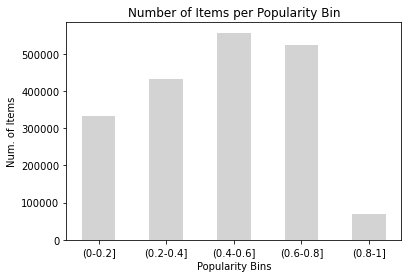

In [38]:
plt.bar(popularity_bins_count.index, popularity_bins_count['Item ID'], width=0.5)
xtick=['(0-0.2]','(0.2-0.4]','(0.4-0.6]','(0.6-0.8]','(0.8-1]']
plt.xticks(popularity_bins_count.index,xtick)
plt.title("Number of Items per Popularity Bin")
plt.xlabel("Popularity Bins")
plt.ylabel('Num. of Items')

Text(0, 0.5, 'Density')

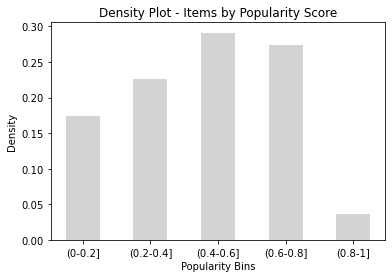

In [39]:
plt.bar(popularity_bins_count.index, popularity_bins_count['density'], width=0.5)
xtick=['(0-0.2]','(0.2-0.4]','(0.4-0.6]','(0.6-0.8]','(0.8-1]']
plt.xticks(popularity_bins_count.index,xtick)
plt.title("Density Plot - Items by Popularity Score")
plt.xlabel("Popularity Bins")
plt.ylabel('Density')

### Within same session are the first and last click more likely to result in a purchase?

In [4]:
testset.columns

Index(['Unnamed: 0', 'Session ID', 'Item ID', 'item_clicked_more_than_once',
       'clicks_per_item', 'ratio_clicks_item_FI5', 'Avg_item_price',
       'Popularity', 'Popularity_Rank', 'Item_Bought_flag', 'Category_flag',
       'max_hour', 'max_day', 'max_month', 'item_clicked_first_f',
       'item_clicked_last_f', 'clicks_bf_first_click', 'clicks_bf_last_click',
       'time_bf_first_click', 'time_bf_last_click', 'avg_time_spent_item'],
      dtype='object')

In [10]:
item_click_f = testset.groupby(['item_clicked_first_f','Item_Bought_flag'],as_index=False)['Session ID'].nunique()
item_click_f

,item_clicked_first_f,Item_Bought_flag,Session ID
0,0,0.0,247013
1,0,1.0,274708
2,1,0.0,119597
3,1,1.0,308994


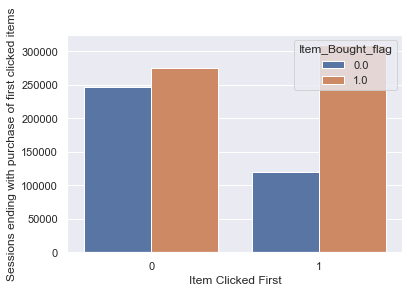

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


sns.barplot(x = item_click_f['item_clicked_first_f'], y = item_click_f['Session ID'], hue = item_click_f['Item_Bought_flag'])
# show the graph
plt.xlabel("Item Clicked First")
plt.ylabel('Sessions ending with purchase of first clicked items')
plt.show()

In [6]:
item_click_l = testset.groupby(['item_clicked_last_f','Item_Bought_flag'],as_index=False)['Session ID'].nunique()
item_click_l

,item_clicked_last_f,Item_Bought_flag,Session ID
0,0,0.0,253254
1,0,1.0,264778
2,1,0.0,128202
3,1,1.0,300388


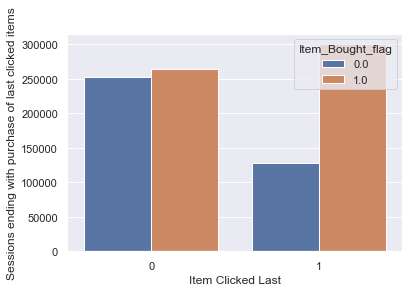

In [26]:
sns.barplot(x = item_click_l['item_clicked_last_f'], y = item_click_l['Session ID'], hue = item_click_l['Item_Bought_flag'])
# show the graph
plt.xlabel("Item Clicked Last")
plt.ylabel('Sessions ending with purchase of last clicked items')
plt.show()

In [9]:
item_click = testset[testset['item_clicked_last_f']==testset['item_clicked_first_f']].groupby(['item_clicked_first_f','Item_Bought_flag'],as_index=False)['Session ID'].nunique()
item_click

,item_clicked_first_f,Item_Bought_flag,Session ID
0,0,0.0,210677
1,0,1.0,178768
2,1,0.0,2772
3,1,1.0,125906


For items clicked first and last, 70% sessions end up buying those items. However, if similar item is clicked first and last, 97.8% sessions end up buying that item.
Also, items clicked in between the session, around 50% end up in buying sessions 

### Purchase Ratio by number of clicks per items

In [46]:
clicks_item_cnt = testset.groupby(['clicks_per_item','Item_Bought_flag'], as_index=False)['Item ID'].nunique()
clicks_item_cnt.head()

,clicks_per_item,Item_Bought_flag,Item ID
0,1,0.0,27099
1,1,1.0,14391
2,2,0.0,13634
3,2,1.0,13145
4,3,0.0,6795


In [47]:
clicks_item_cnt1 = clicks_item_cnt.pivot(index='clicks_per_item', columns='Item_Bought_flag', values='Item ID')
clicks_item_cnt1 = clicks_item_cnt1.rename(columns={0.0:'Not Bought',1.0:'Bought'})

In [48]:
clicks_item_cnt1 = clicks_item_cnt1.reset_index()
clicks_item_cnt1 = clicks_item_cnt1.fillna(0)
clicks_item_cnt1['perc_bought'] =clicks_item_cnt1['Bought']/( clicks_item_cnt1['Not Bought']+clicks_item_cnt1['Bought'])
clicks_item_cnt1.head()

Item_Bought_flag,clicks_per_item,Not Bought,Bought,perc_bought
0,1,27099.0,14391.0,0.346855
1,2,13634.0,13145.0,0.490870
2,3,6795.0,8688.0,0.561132
3,4,3444.0,7074.0,0.672561
4,5,1613.0,3379.0,0.676883


Text(0, 0.5, 'Ratio of Items Purchased')

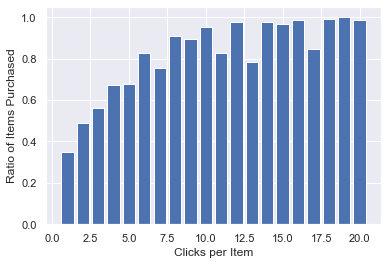

In [54]:
clicks_item_cnt2=clicks_item_cnt1[clicks_item_cnt1['clicks_per_item']<=20]
plt.bar(clicks_item_cnt2.clicks_per_item, clicks_item_cnt2['perc_bought'])

plt.xlabel("Clicks per Item")
plt.ylabel('Ratio of Items Purchased')

Higher the number of clicks on an item in any session, higher the ratio of item purchase